# 4.3 Model Training

We will practice training machine learning models for both regression and classification problems. 

Model training is fundamental in Machine Learning is as important, if not more important, in building well developed models.

Important aspects of model training are:
1. *Training data*: its characteristics, its diversity, its balance among classes and examples
2. *Loss function*: choice of residual norm, choice and importance of model regularization, physics-relevant losses.
3. *Optimizer*: algorithm to sample the ovjective loss.
4. *Generalization and testing*: cross validation to evaluate training performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

##  1. Standard Loss functions 

A loss function measures how well a model’s predictions align with the ground truth. It provides a numerical value that quantifies the "error" or "misfit," which the optimization algorithm minimizes during training.

Purpose: Drives the neural network’s learning by guiding updates to the model's parameters via backpropagation.

In geoscience, data often involve
* complex, noisy, and heterogeneous datasets (e.g., seismic waveforms, geospatial grids).
* Unique domain-specific goals, such as predicting rare events (e.g., earthquakes, landslides) or optimizing energy resources.
Loss functions are critical because they shape how the neural network interprets errors and focus learning on specific aspects of the data or model goals (e.g., spatial accuracy, uncertainty quantification).


### 1.1 Regression
Loss functions measure the difference between the data and the predictions. Loss functions $\mathcal{L}(\mathbf{y},\mathbf{\hat{y}},\mathbf{w}) $ quantify the magnitude of the residuals between the ground truth labels $\mathbf{y}$ and the predicted outputs $\mathbf{\hat{y}}$ are differentiable with respect to model parameters.

In regressions, the most common loss functions are:

* Mean Square Error:
    MSE penalizes large errors, is suitable when the error distribution is normal.

    $ MSE(\mathbf{y},\mathbf{\hat{y}},\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}_i - y_i \right) ^2 $
* Mean Absolute Error:
    MAE penalizes less large errors, is suitable when the error distribution is exponential (heavy-tailed disribution).Caveats When Using MAE:
    * Gradient Behavior:
        * MAE has constant gradients (±1) for errors, which may lead to slower convergence during optimization, particularly with gradient-based optimizers like SGD.
        * Using advanced optimizers (e.g., Adam) or combining MAE with other loss functions can address this.
    * For models requiring smoother training curves and higher sensitivity to large errors, MSE might be preferred. 

    $MAE(\mathbf{y},\mathbf{\hat{y}},\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m |\hat{y}_i - y_i|$

* Huber Loss: combining MSE and MAE
If you want a balance, consider using Huber Loss (which combines MAE and MSE).
    1. **Quadratic Term**:
        - When the error $( |y - \hat{y}| )$ is small $( \leq \delta )$, the loss behaves like **MSE** $(( \frac{1}{2}(y - \hat{y})^2 ))$.
        - This allows for smoother gradients and better convergence during training.
    2. **Linear Term**:
        - When the error $( |y - \hat{y}| )$ is large $( > \delta )$, the loss behaves like **MAE** $( \delta \cdot |y - \hat{y}| - \frac{1}{2}\delta^2 )$.
        - This reduces the influence of large errors or outliers.


The regression aims to find $\mathbf{w}$ that minimizes the loss function $\mathcal{L} $. Other loss functions that may be used can be found here: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0


### 1.2 Classification

***Binary Classification***

The Logistic regression estimates the probability that an instance belongs to the positive class. If the probability is above a threshold, then the instance is classified in the positive class. The probability is estimated using a **logistic sigmoid function**:

$\sigma(x) = \frac{1}{1+ \exp(-x)}$

Training a logistic regression is to tune the model such that the output score is low for a negative instance and high for a positive instance. The loss function associated with logistic regression is the $\log$ function due to its property that it is really high at low values of $x$ and really low at high values of $x$. The cost function over a batch of $m$ instances is the sum of the individual instance cost functions, which is called the **cross-entropy loss**:


$ \mathcal{L}(\mathbf{w}) = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{p}_i(\mathbf{w})) + (1 - y_i) \log(1-\hat{p}_i(\mathbf{w}))\right]  $, 

where $m$ is the number of instances, $\hat{p}_i = \sigma(\mathbf{w}(x)) $ is the probability output by the model of the instance $x$, and $y_i$ is the class of the instance. The log loss is differentiable with respect to the model parameters, and one can use Gradient Descent to optimize the model parameters.

In Scikit-learn, ``LogisticRegression`` is equivalent to training a logistic regression using a log loss ``SGDClassifier(loss='log')``.


***Multi-class Classification***

A multi-class logistic regression is a ***softmax or multinomial regression***. The softmax regression model first computes scores $\mathbf{s} = s_k, k=1,...,K$ for each of the $K$ classes that are computed using a simple linear regression prediction. The ouput probabilities for each class  $k$are calculated using the softmax function:

$\hat{p}_k = \sigma(\mathbf{s}) = \frac{\exp(s_k)}{ \sum_{i=1}^K \exp(s_i)}$

The **softmax** function is the activation layer to be added at the last layer of a neural network for classification.
An appropriate loss function to use is called ***Cross Entropy*** cost function:


$ \mathcal{L}(\mathbf{y},\mathbf{\hat{y}},\mathbf{w}) = - \frac{1}{m} \sum_{i=1}^m  \sum_{i=1}^K y_i \log(\hat{p}_i(\mathbf{w}))  $,

where $m$ is the batch size, or number of instances-data samples-- used in training.


The rest of the training requires similar tricks to the regression model training. The performance metrics are precision, recall, F1 scores etc etc as seen in previous notes.


### 2 Customization

Standard loss functions may fail to capture unique geoscientific objectives, such as:
* Spatial-temporal coherence.
* Rare event detection.
* Physical constraints (e.g., energy conservation).
Provided that losses can be differentiated, we can customize the loss based on the task. For examples:

* To address class imbalance: Increase weights for rare seismic events.
* Multi-objective Loss: Combines multiple goals, e.g., spatial accuracy and temporal consistency. For example, a combined MSE for seismic amplitude prediction and a term for maintaining temporal coherence.
* Physics-Informed Loss Functions: Incorporates domain knowledge (e.g., governing equations). For example, penalize outputs that violate physical laws, such as conservation of mass or energy.
* Uncertainty-Aware Loss: Penalizes under- or over-confidence in probabilistic forecasts. For example, use negative log-likelihood for probabilistic predictions of earthquake magnitudes.

##  2. Convexity of the Loss and Learning Rate


The convexity of the loss determines the behavior of the optimization for model training.



## 3. Optimization 

### 3.1 Gradient Descent

Gradient Descent marches down the loss function through by sampling the parameter space: it evaluates the loss function and attempts to find its global minimum. The model $\mathbf{w}$ is updated iteratively in the direction that reduces the loss:

$w_j^{(k + 1)} = w_j^{(k)} - \alpha \frac{\partial \mathcal{L}}{\partial w_j}$ for $j = 1 , \cdots , n ,$
 
where $\alpha$ is the **learning rate**.

| ![Gradient Descent](../img/GD_cartoon.jpeg) | ![Gradient Descent non convex](../img/GD_non_global.png) |
|---------------------------------------------|---------------------------------------------------------|
| Gradient descent for a convex, well-behaved loss function. | Gradient descent in a poorly behaved loss function with local minima. |


| ![Gradient Descent](../img/GD_AlphaTooSmall.png) | ![Gradient Descent non convex](../img/GD_AlphaTooLarge.png) |
|---------------------------------------------|---------------------------------------------------------|
| Learning rate $\alpha$ is too small. It will take longer to converge.| Learning rate $\alpha$ is too large. Converge to global minimum. |


### 3.2 Batch Gradient Descent
Batch GD is performing the GD over the entire data and taking the steps to go down the gradient by finding the appropriate learning rate $\alpha$. 

The iteration in GD can be stopped by imposing a convergence rate (tolerance) that is a threshold under which the error will no longer be calculated. Gradient Descent require re-scaling the data.

In pytorch, gradient descent can be 

### 3.3 Stochastic Gradient Descent
SGD takes the gradient for each single instance. By default, SGD in Scikit-learn will minimize the MSE cost function. The advantages of SGD are:
* Efficiency.
* Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:

* SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.

* SGD is sensitive to feature scaling.

### 3.4 Mini Batch Gradient Descent
It is a combination of Batch GD and SGD. Minibatch computes the gradient over a subset of instances (as against a single one in SGD or the full one in Batched GD). At each step, using one minibatch randomly drawn from our dataset, we will estimate the gradient of the loss with respect to our parameters. Next, we will update our parameters in the direction that may reduce the loss. 


## 4. Under-fitting and Overfitting

To evaluate the performance of the model on training and its generalization, we have to assess whether the model underfit or overfit. Overall, fitting a model involves reducting *biases* and *variance*.

**Bias**
Biases are signature of high loss after training. This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data. Biased is reduced by adjusting, optimizing the model to get the best performance possible on the training data.

**Variance**
Variances are signature of high loss during testing. Typically, exessively low residuals in the predicting the training data indicate low bias in training with the risk of a high variance in testing. This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data. Variance is reduced

**Irreducible, minimal error**
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

**Underfitting** occurs when the model is too simple, the **bias is high** but the **variance is low** in predicted data. This occurs in most cases at the beginning of training, where the model has not yet learned to fit the data. With iterative training, the algorithm starts by underfitting the data (high loss for both validation and training data) and progressively "learns" and improves the fit. It remains a problem with the loss in both training and validation have high values. 

The solution is to increase the complexity of the model, or to design better feature from the data (feature engineering), and to reduce the constraints on the model (such as the parameterization of model regularization). Underfitting is identified by having a high bias and low variance of the residuals. It is usually obvious and rarely a problem because the training and validation errors are high.

**Overfitting** occurs when the model is too complex, the bias is low but the model variance is high. Data may contain noise that should not be fit by the algorithm. It happens when the model is too complex relative to the amount and the noisiness of the training data. Overfitting is a common problem in geoscience machine learning problems. Overfitting can be detected when the model performs perfectly on the training data, but poorly on the validation and test data. For some particular cases, overfitting is okay: for instance when the test data will be similar to the training data (e.g., earthquake detection, geospatial image compression).

Through the iterations of training, the model will first underfit may risk overfitting without active mitigation. The most direct way to detect overfitting is through the training and validation loss: both training and validation losses should be low. If the training loss is much lower than the validation loss, the model is overfitting. If both losses are high, then the model underfits.

The evolution of the **learning curve** helps at measuring the evolution from underfit to overfit by analyzing the evolution of the learning curves. 

More robust assessment of the model fitting is through **cross validation**.


Some solutions are to reduce the model size, reduce the number of attributes in the training data, gather more training data, to reduce the noise in the training data (fix data errors and remove outliers). Another way to keep the model complexity but constrain its variance is called **regularization**.  

***You do not know if you overfit, until you do***. The model may not be complex enough until your reached overfitting. Once reached, back up a little bit to find the best tradeoff in optimization and generalization.


# 3) Regularization

Constraining the model complexity to make it simpler is called **regularization**. 

## 3.1 Ridge Regression

To regularize the model, we can reduce model parameter variance by imposing that the norm of the model parameters is small. Assuming that the model parameters follow a normal (Gaussian) distribution, we want to minimize the L2 norm (equivalent to the mean square of the model parameters:

$\mathcal{L}(\mathbf{w})  = MSE(\mathbf{w})  + \lambda \frac{1}{2} || \mathbf{w} ||_2^2$, 

where $|| \mathbf{w} ||_2 = \sum_{i=1}^n w_i^2$ is the L2 norm of the model parameters, $\lambda$ is a hyperparameter to tune to balance the contribution of model norm as against the residual norms. L2 norm is sensitive to outliers in the distributions. 
Ridge Regression is sensitive to data scale, so do not forget to scale input data.


## 3.2 Lasso Regression
Lasso Regression is just like the Ridge Regression a way to minimize model variance. Instead of minimizing the L2 norm, we minimize the L1 norm:

$\mathcal{L}(\mathbf{w})  = MSE(\mathbf{w})  + \lambda  || \mathbf{w} ||_1$, 

The L1 norm $|| \mathbf{w} ||_1 = \sum_{i=1}^n | w_i |$ is appropriate for exponential (Laplace) distribution, and allow to not be penalized by outliers. It tends to eliminate the weights of the least important features. It effectively performs a *feature reduction* and output a *sparse model*. It can be called in SGD by using the argument ``penalty="l1"``.


## 3.3 Elastic Net

Combine Ridge and Lasso, weigh the contribution of each norm (L1 and L2) using the hyperparameter $r$, and the contribution of the regularization in the loss function with $\lambda$.

$\mathcal{L}(\mathbf{w})  = MSE(\mathbf{w})  + r  \lambda|| \mathbf{w} ||_1 + \frac{1-r}{2}  \lambda|| \mathbf{w} ||_2^2$, 

In [4]:
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge
sgd_reg = SGDRegressor()
ridge_reg = Ridge(alpha=0.1)
lasso_reg = Lasso(alpha=0.1)
ela_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)

# prep the data again
x = np.asarray(date_year[0:4*365]).reshape(-1,1)
y = np.asarray(ue[0:4*365]).reshape(-1,1)
x = x-np.min(x)
G = np.c_[np.ones((len(x),1)),x]
scale = (np.max(y)-np.min(y)) # minmax scaling

# Fit
sgd_reg.fit(x,y)
ridge_reg.fit(x,y)
lasso_reg.fit(x,y)
ela_reg.fit(x,y)

# make prediction
y_sgd=sgd_reg.predict(x)
y_sridge=ridge_reg.predict(x)
y_lasso=lasso_reg.predict(x)
y_ela=ela_reg.predict(x)

w_sgd=[sgd_reg.intercept_[0],sgd_reg.coef_[0]]
w_ridge=[ridge_reg.intercept_[0],ridge_reg.coef_[0]]
w_lasso=[lasso_reg.intercept_[0],lasso_reg.coef_[0]]
w_ela=[ela_reg.intercept_[0],ela_reg.coef_[0]]
print(w_sgd,w_ridge,w_lasso,w_ela)

fig,ax=plt.subplots(1,1)    
ax.plot(x,y);ax.grid(True)
ax.plot(x,G.dot(w_sgd))
ax.plot(x,G.dot(w_ridge))
ax.plot(x,G.dot(w_lasso))
ax.plot(x,G.dot(w_ela))
ax.legend(['data','SGD','Ridge','Lasso','Elastic'])

NameError: name 'date_year' is not defined

/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before converg

(0.0, 30.0)

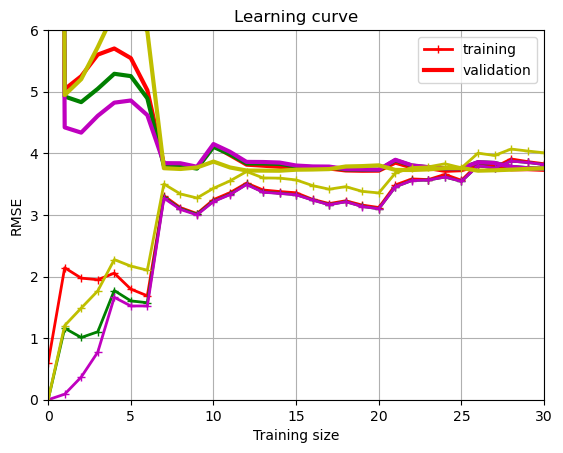

In [12]:
# perform the regressions
plot_learning_curves(sgd_reg, x.ravel(), y.ravel(),"r-+","r")
plot_learning_curves(ridge_reg, x.ravel(), y.ravel(),"g-+","g")
plot_learning_curves(lasso_reg, x.ravel(), y.ravel(),"m-+","m")
plot_learning_curves(ela_reg, x.ravel(), y.ravel(),"y-+","y")
plt.ylim([0,6])
plt.xlim([0,30])

We see that there needs to be at least 10 samples in the training set for the models to generalize reasonably well. We also  see that all of the regularization mechanisms yield seemingly similar behavior at the training. After a sufficient number of samples, validation loss goes below training loss.

**model complexity**

Now we will try and fit the step in the data.



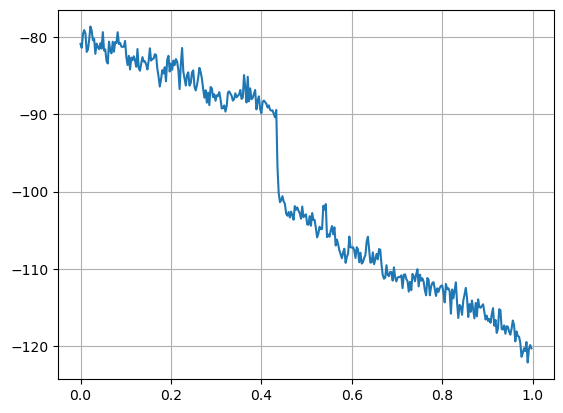

In [13]:
x = np.asarray(date_year[3*365:4*365]).reshape(-1,1)
y = np.asarray(ue[3*365:4*365]).reshape(-1,1)
x = x-np.min(x)
# G = np.c_[np.ones((len(x),1)),x]
scale = (np.max(y)-np.min(y)) # minmax scaling
newy = y / scale
plt.plot(x,newy*scale);plt.grid(True)


The data looks complex, with the superposition of a linear trend and oscillatory signals. Let's fit a general polynomial form. We will start with a simple model.

(365, 3)


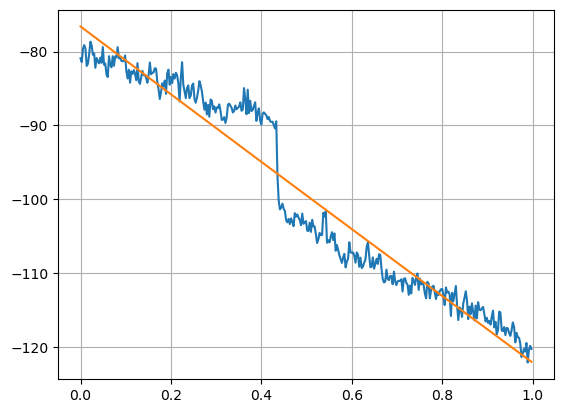

In [14]:
from sklearn.preprocessing import PolynomialFeatures


#Let's start with a simple
poly_features = PolynomialFeatures(degree=2)
G = poly_features.fit_transform(x) # G now contains the original feature of X plus the power of the features.


ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(G,y)
y_ridge=ridge_reg.predict(G)
print(G.shape)

plt.plot(x,y);plt.grid(True)
plt.plot(x,y_ridge)

(0.0, 100.0)

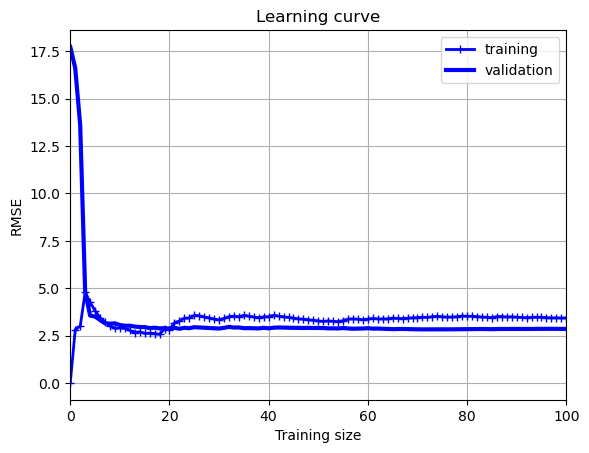

In [15]:
plot_learning_curves(ridge_reg, G.ravel(), y.ravel(),"b-+","b");plt.xlim([0,100])

(2.0, 4.0)

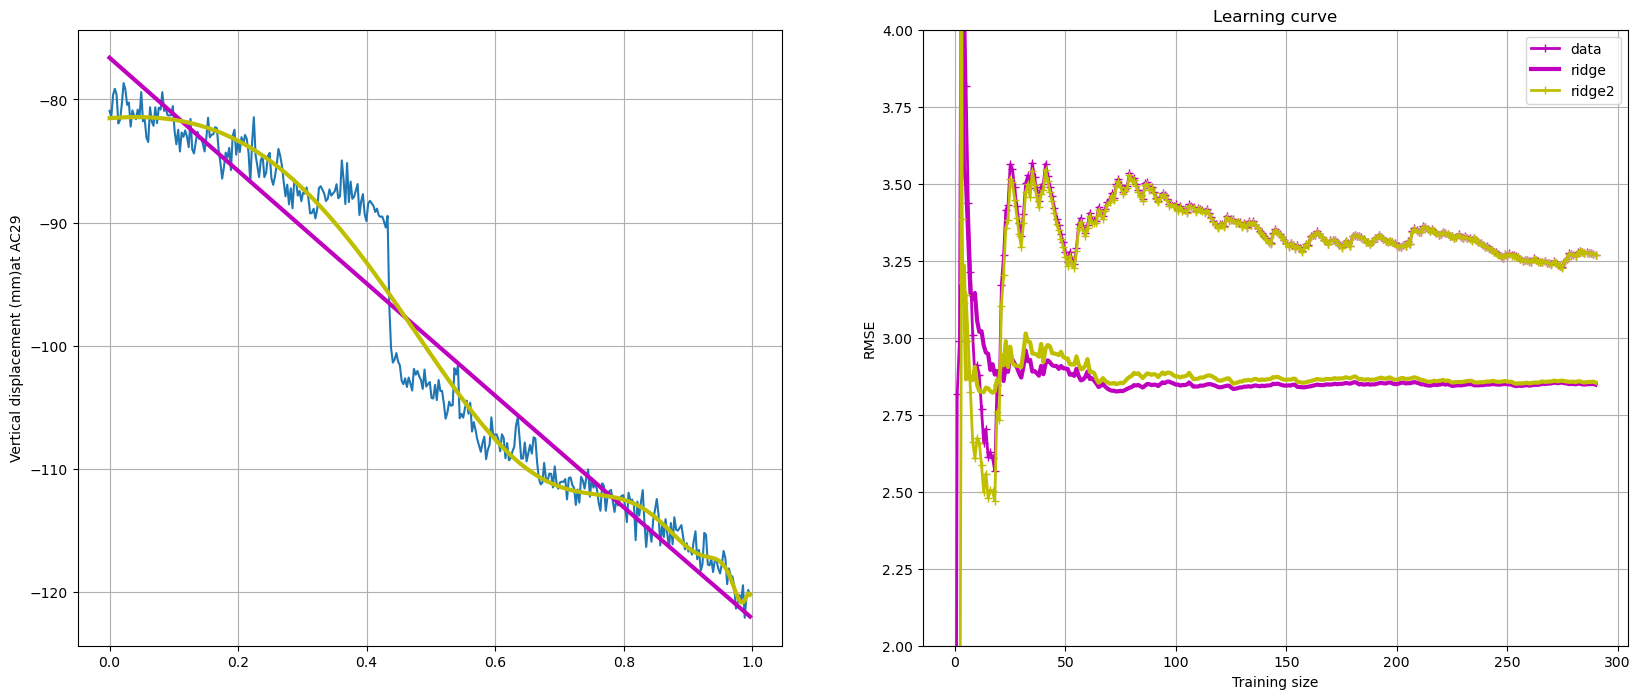

In [17]:
# Let's make it complex
poly_features = PolynomialFeatures(degree=400)
G2 = poly_features.fit_transform(x) # G now contains the original feature of X plus the power of the features.


ridge_reg2 = Ridge(alpha=0.001)
ridge_reg2.fit(G2,y)
y_ridge2=ridge_reg2.predict(G2)

fix,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].plot(x,y);ax[0].grid(True)
ax[0].plot(x,y_ridge,"m",linewidth=3)
ax[0].plot(x,y_ridge2,"y",linewidth=3)
# ax[0].set_ylim([-10,20])
ax[0].set_ylabel('Vertical displacement (mm)at AC29')
plot_learning_curves(ridge_reg, G.ravel(), y.ravel(),"m-+","m");#plt.xlim([0,200])
plot_learning_curves(ridge_reg2, G2.ravel(), y.ravel(),"y-+","y");#plt.xlim([0,200])
# plt.legend(['data','ridge','ridge2'])
plt.ylim([2,4])

## 3.4 Clever Loss Functions


Loss functions are be engineered to satisfy conditions beyond mean square errors. We willustrate below with a few examples.
* A neural network reconstruct earthquake seismograms and, ideally, the seismograms would be reconstructed with a wiggle-to-wiggle match. A loss function that includes a correlation coefficient, that is a metrics of time series similarity that has strong sensitivity to relative polarity, will improve the model performance. The loss function may be :

    $\mathcal{L}(\mathbf{\hat{u}},\mathbf{u})  = MSE(\mathbf{\hat{u}} - \mathbf{u})  + \lambda (1 - CC(\mathbf{\hat{u}},\mathbf{u}))$, 

* A Neural Network outputs a physical field (e.g., temperature) that should obey physics. We were not able to embed physical laws in the network design. But we can constrain that the trained network is constrained by physical laws. This is the basis for **Physics Informed Neural Networks - PINNs**. We design the loss functions such that the temperature obeys 


# 4. Early stopping


In gradient descent, learning of the algorithm means that we are "training" the algorithm iteratively. As we keep training the model.

Another strategy to regularize the learning is to stop training as soon as the validation error reaches a minimum. Now instead of looking at the errors as a function of training size, we look at them as a function of epoch.

/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/marinedenolle/opt/miniconda3/envs/mlgeo/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before converg

(0.0, 30.0)

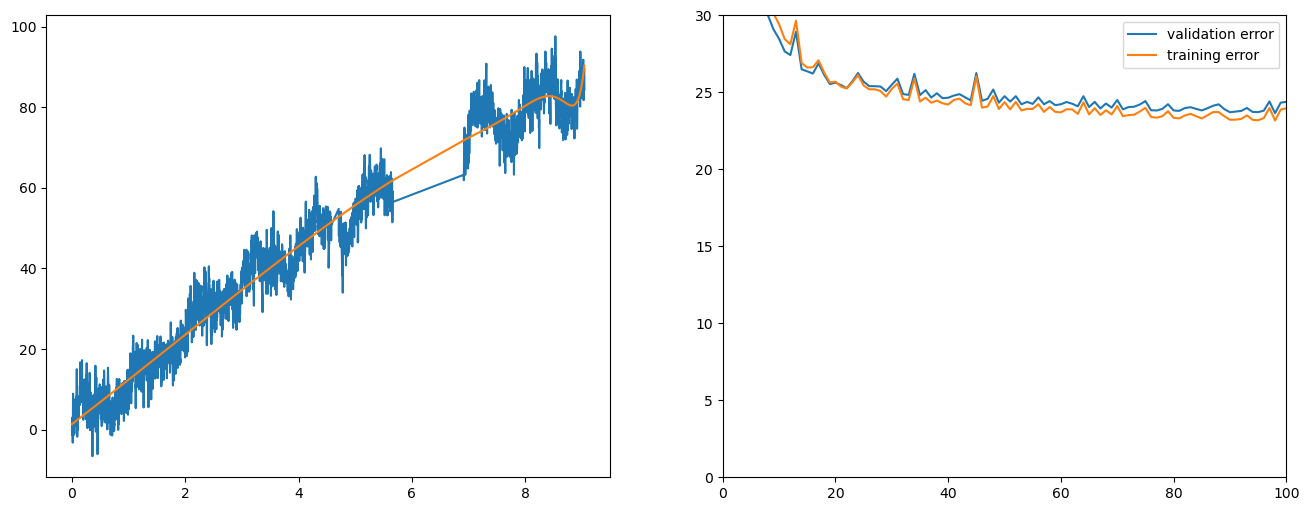

In [19]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x = np.asarray(date_year[:]).reshape(-1,1)
x=x-np.min(x)
y = np.asarray(uv[:]).reshape(-1,1)



X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3,random_state=42)

# use the Pipeline function from sklearn to get prepare your data.
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=50)),
        ("std_scaler", StandardScaler()) ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_poly = poly_scaler.fit_transform(x)
X_val_poly_scaled = poly_scaler.transform(X_val)

# set the gradient with a single iteration since we will iterate over epochs.
# warm_start=True says that you should keep the previous state of the model to retrain.
sgd_reg = SGDRegressor(max_iter=1, tol=0.001, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
val_error=np.zeros(1000)
train_error=np.zeros(1000)

for epoch in range(1000):
    
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    
    val_error[epoch] = mean_squared_error(y_val, y_val_predict)
    train_error[epoch] = mean_squared_error(y_train, y_train_predict)
    
    if val_error[epoch] < minimum_val_error: # you will stop and save the best model
        
        minimum_val_error = val_error[epoch]
        best_epoch = epoch
        best_model = clone(sgd_reg)
        best_y = sgd_reg.predict(X_poly)
        
        
        
fig,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].plot(x,y);
ax[0].plot(x,best_y)
ax[1].plot(np.arange(1000),val_error)
ax[1].plot(np.arange(1000),train_error)
plt.legend(["validation error","training error"])
plt.xlim([0,100]);plt.ylim([0,30])


You may also consider the parameter ``early_stopping=True`` in SGD to automatically implement early stopping and deal with overfitting.

# 1) Problem set up

To demonstrates the impact of model training, we will first set up a simple regression problem.


# 6) Checklist for training a Deep Learning model

1. **Characterize Data**: Return to Chapter 2 for proper characterization of the data, especially its dimensionality and most basic data correlations.
2. **Test data**: The test data will be used after training to evaluate model performance. Set aside test data. Consider causality among data samples, consider independence of the test data with respect to training data. 
3. **Characterize Training Data**: Training data needs to be diverse for proper training. The greater the training data homogeneity, the lower quality of the *trained* model. ***Data augmentation*** techniques can help diversify the training data. In particular, transformation such as shifting, rotating, adding noise, particularly help diversifying the training data and acts are a regularization.
4. **Deep Neural Network Design**: Identify and define architecture of deep neural network. Consider problem characteristic (regression, classification), data input size and characteristics (e.g., multiscale). Start with simple model design, take examples on classic architectures (e.g., LeNet).
4. **Define the Loss Function**: There are loss functions for classification (most of them use logs) and for regressions (they may use exponentials). Follow the documentation of your ML API: https://keras.io/api/losses/, https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics, https://pytorch.org/docs/stable/nn.html#loss-functions. The Loss function

5. Define the optimization algorithm 
The most popular optimizer algorithms compute the first derivative (gradient) of the loss functions. They include Gradient Descent, Momentum, Adagrad, RMSProp, Adam.
6. Model training

Prepare the folds for K-fold cross validation. Scale the data.
Define the model parameters in a dictionary. Define the number of epochs, learning rate, batch size.

For each fold:
Initialize the model parameters.
for each epoch (iteration), train the algorithm on a minibatch of training examples. Training consists in 1) passing the training data through our model to obtain a set of predictions, 2) calculating the loss, 3) computing the gradient (either known, or using backward passes in neural networks), and 4) updating the model parameters using an optimization algorithm (e.g. Stochastic Gradient Descent).


7. Fine tune the training

Compute learning rate as a function of training size to get a sense for the batch size desired to properly train.

Compute the validation and training error as a function of epochs. Find the minimum of the validation error and stop the training there.

### Exercise


Take the models in previous chapters and practice training models by testing 1) regularization (in the loss or using dropout), 2) optimization (algorithm, learning rate), 3) training data batch